## Plane Waves
$$ \Psi (x) = e^{i\vec{k} \cdot \vec{r}} $$

where
* $ i = \sqrt{-1} $
* $ \vec{k} = $ wave vector, also has the relation $ |\vec{k}| = {2\pi \over{\lambda}} $
* $ \vec{r} = $ position vector

Aim: Make a function to represent the plane wave and one to propagate the plane wave. Then using an arbitrary value of the wave vector, calculate and plot the value of the plane wave over a grid of points.

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [2]:
# Global Variables
i = np.sqrt(-1+0j)

In [27]:
# Plane wave function
def plane_wave(k,r):
    """Produce a plane wave with wave vector, k, at position, r. 
    k and r are both vectors.
    [Requires numpy]"""

    return np.exp(np.sqrt(-1+0j)*(np.dot(k,r)))

def propagate(k, r1, r2):
    """Propagate a plane wave from position r1 to r2.
    Can give the wave using the plane wave function, or from the k and r values. Use one or the other parameters, always give an r2.
    [Requires numpy]"""

    r2_wave = plane_wave(k,r1)*np.exp(np.sqrt(-1+0j)*k[2]*(r2[2]-r1[2]))

    return r2_wave

def propagate_z(k, z1, z2):
    """Propagate a plane wave travelling along the z axis (x=0,y=0)."""

    return plane_wave(k,np.array([0,0,z1]))*np.exp(np.sqrt(-1+0j)*k[2]*(z2-z1))



In [62]:
prop_list = []
#k = np.array([9e6,9e6,9e6])
k = np.array([0,0,0.31425])

for i in np.arange(0,50,0.01):
    prop_list.append(propagate_z(k,0,i))

prop_array = np.array(prop_list)

c:\Users\elija\Documents\University\Project\PyTorch Test\.venv\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


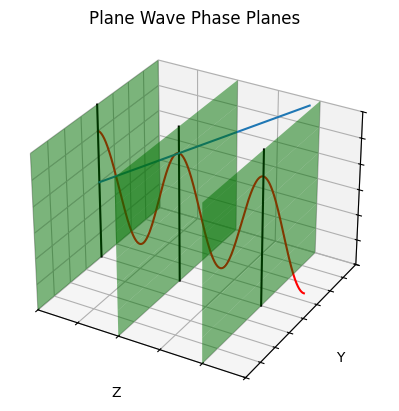

In [114]:
ax = plt.axes(projection="3d")

x = np.arange(0,50,0.01)
y = np.zeros(shape=(1,5000))
z = prop_array
k_z = k[2]
z_line = np.arange(-1.5,2,0.5)

ax.set_xlabel('Z', fontsize=10), ax.set_ylabel('Y', fontsize=10), ax.set_zlabel('Z', fontsize=10)
ax.set_xlim(0,50), ax.set_ylim(-1,1), ax.set_zlim(-1.5,1.5)
ax.set_title("Plane Wave Phase Planes")
ax.xaxis.set_ticklabels([]), ax.yaxis.set_ticklabels([]), ax.zaxis.set_ticklabels([])

ax.plot(x,y,z, color="red")
ax.plot(0,0,z_line, color="black")
ax.plot((2*np.pi)/(k_z),0,z_line, color="black")
ax.plot(2*(2*np.pi)/(k_z),0,z_line, color="black")

ax.plot(x,y,0.05*x)

Z, Y = np.meshgrid(np.arange(-1.5, 2, 0.5), np.arange(-1, 2))
X = 0*Z
ax.plot_surface(X, Y, Z, alpha=0.5, color="green")

Z, Y = np.meshgrid(np.arange(-1.5, 2, 0.5), np.arange(-1, 2))
X = (2*np.pi)/(k_z)
ax.plot_surface(X, Y, Z, alpha=0.5, color="green")

Z, Y = np.meshgrid(np.arange(-1.5, 2, 0.5), np.arange(-1, 2))
X = 2*(2*np.pi)/(k_z)
ax.plot_surface(X, Y, Z, alpha=0.5, color="green")

plt.show()

In [19]:
k = np.array([9e6,9e6,9e6])
r1 = np.array([0,0,0])

print(f"{propagate(k,r1,r2=np.array([1,2,100]))}")
print(f"{propagate(k,r1,r2=np.array([5050,32542,5]))}")

(0.20405335192869403-0.9789597691257106j)
(-0.9277627032958984+0.3731706933470083j)


In [110]:
k = np.array([0,0,0.31425])
r1 = np.array([0,0,0])
r2 = np.array([5,2,20])

propagate(k,r1,r2)

(0.9999983534454356+0.0018146918244157522j)

In [ ]:
for i in np.arange(0,50,0.01):
    